# Content of notebook:

This notebook contains:
- Language Distributions
- Comparison of five years before the war and five years during the war
    - Comparison of absolute frequency of the performances
        - Ratios
    - Comparison of absolute frequency of the productions/titles
        - Ratios
    - Comparison of absolute frequency of the premieres
        - Ratios
- Number of Wehrmacht-events

# Distribution of languages and performances

Load dataset with all preprocessing steps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Dataset 1893-1946

In [2]:
# Dataset 1893-1946
df_1893_1946 = pd.read_csv("../Materials/Merged_Dataset.csv", encoding='utf-8', index_col=False)
sns.set_palette("Set2")

In [3]:
#strip leading and trailing whitespaces
for column in df_1893_1946.columns:
    try:
        df_1893_1946[column] = df_1893_1946[column].str.strip()
    except AttributeError:
        continue

# Drop the column Unnamed: 0
df_1893_1946 = df_1893_1946.drop(columns=['Unnamed: 0'])
df_1893_1946.head()

,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season,Directors,Title_Language,Leaflet_Language,Opmerking
0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,903641,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
1,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,316913,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
2,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,135474,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
3,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,520507,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
4,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,446314,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN


# Language Distribution

## Preprocessing 1893-1946

In [4]:
counts = df_1893_1946.groupby('Season')['Original language'].value_counts().unstack().fillna(0)
#Use grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season).

# To maintain readability of the table, we only keep the five most common languages
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

#We add zero counts for each language during the period when the Opera was closed.
counts.loc['1914-1915'] = [0, 0, 0, 0]
counts.loc['1915-1916'] = [0, 0, 0, 0]
counts.loc['1916-1917'] = [0, 0, 0, 0]
counts.loc['1917-1918'] = [0, 0, 0, 0]

counts = counts.sort_index()
x = list(counts.index.unique())

# Add zero counts for each language during the period when the Opera was closed.
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
closed_data = {col: 0 for col in counts.columns}
closed_df = pd.DataFrame([closed_data], index=closed_seasons)
counts = pd.concat([counts, closed_df])

# Sort the index so that the seasons occur chronologically on the plot.
counts = counts.sort_index()
x = list(counts.index.unique())

## Relative frequencies 1893-1946

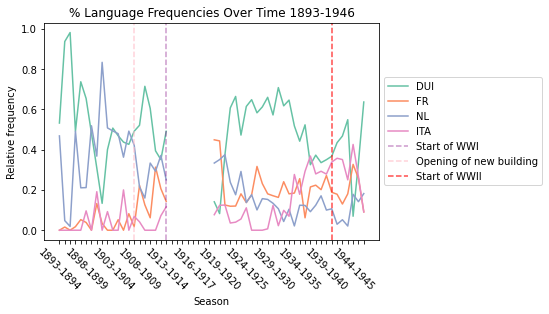

In [5]:
total_counts = counts.sum(axis=1) #we sum across rows to get total of performances per season

# compute the relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('% Language Frequencies Over Time 1893-1946')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]  # Show every 5 years
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Absolute freqs 1893-1946

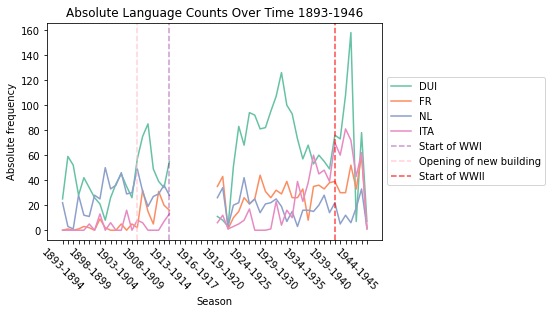

In [6]:
# Convert 0 to NaN counts for each language during the period when the Opera was closed.
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
counts.loc[closed_seasons, :] = np.nan

# Sort the index so that the seasons occur chronologically on the plot.
counts = counts.sort_index()
x = list(counts.index.unique())

counts.plot(kind='line')

plt.title('Absolute Language Counts Over Time 1893-1946')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## No Wagner

In [7]:
#Drop all rows containing Wagner
df2 = df_1893_1946.drop(df_1893_1946[df_1893_1946['Composer'].str.contains('Wagner', na = False)].index)
len(df2)

5861

In [8]:
#same as previously but without wagner
counts = df2.groupby('Season')['Original language'].value_counts().unstack().fillna(0)
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

counts.loc['1914-1915'] = [0, 0, 0, 0]
counts.loc['1915-1916'] = [0, 0, 0, 0]
counts.loc['1916-1917'] = [0, 0, 0, 0]
counts.loc['1917-1918'] = [0, 0, 0, 0]
counts = counts.sort_index()
x = list(counts.index.unique())

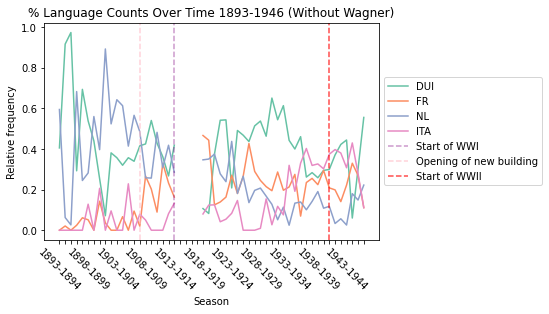

In [9]:
total_counts = counts.sum(axis=1)

rel_counts = counts.divide(total_counts, axis=0)
rel_counts.plot(kind='line') #make sure it's a lineplot.

plt.title('% Language Counts Over Time 1893-1946 (Without Wagner)')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x= 20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
x_ticks = [x[i] if i % 5 == 0 else '' for i in range(len(x))]  # Show every 5 years
plt.xticks(np.arange(len(x)), x_ticks, rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Select 1933-1946

In [10]:
# select only the seasons 1933-1946
df_1933_1946 = df_1893_1946[(df_1893_1946['Season'] >= '1933-1934') & (df_1893_1946['Season'] <= '1945-1946')]
df_1933_1946.shape

(2488, 18)

In [11]:
counts = df_1933_1946.groupby('Season')['Original language'].value_counts().unstack().fillna(0)
#Use grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season).

# To maintain readability of the table, we only keep the five most common languages
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

## Relative frequencies 1933-1946

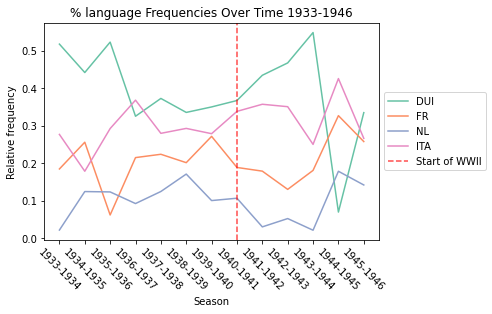

In [12]:
total_counts = counts.sum(axis=1) #we sum across rows to get total of performances per season

# compute the relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='line')

plt.title('% language Frequencies Over Time 1933-1946')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
plt.xticks(np.arange(len(x)), x, rotation=-45)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Absolute frequencies 1933-1946

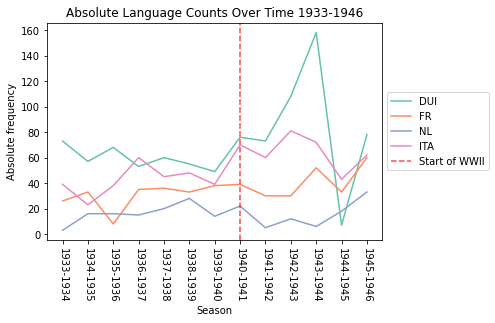

In [13]:
counts.plot(kind='line')

plt.title('Absolute Language Counts Over Time 1933-1946')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
plt.xticks(np.arange(len(x)), x, rotation=-90)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# No Wagner

In [14]:
#Drop all rows containing Wagner
df3 = df_1933_1946.drop(df_1933_1946[df_1933_1946['Composer'].str.contains('Wagner', na = False)].index)
len(df3)

2262

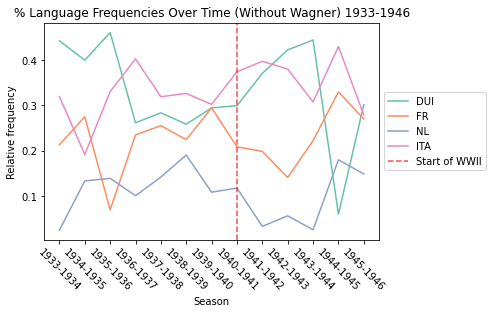

In [15]:
#same as previously but without wagner
counts = df3.groupby('Season')['Original language'].value_counts().unstack().fillna(0)
counts = counts[['DUI', 'FR', 'NL', 'ITA']]

total_counts = counts.sum(axis=1)

rel_counts = counts.divide(total_counts, axis=0)
rel_counts.plot(kind='line') #make sure it's a lineplot.

plt.title('% Language Frequencies Over Time (Without Wagner) 1933-1946')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.legend(loc = 0)
x = list(counts.index)
plt.xticks(np.arange(len(x)), x, rotation=-45)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Comparison of five years before the war and five years during the war

## Comparison of absolute frequency of the performances

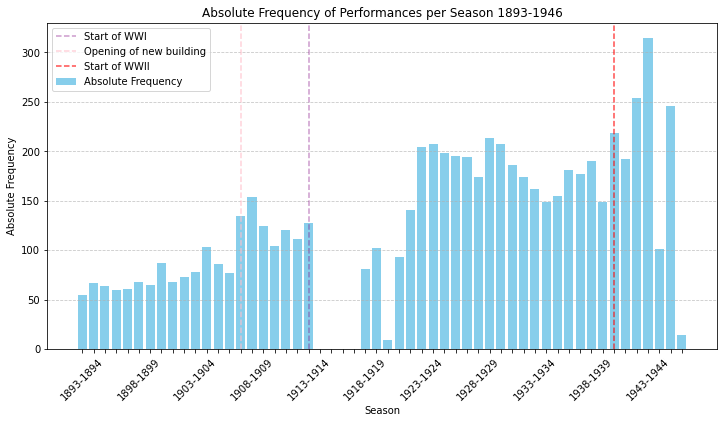

In [16]:
# Count the number of performances per season
season_counts = df_1893_1946['Season'].value_counts().sort_index()

# Add zero counts for the period when the opera was closed
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
season_counts = season_counts.reindex(season_counts.index.union(closed_seasons), fill_value=0)

plt.figure(figsize=(12, 6))
plt.bar(season_counts.index, season_counts.values, color='skyblue', label='Absolute Frequency')

# Add vertical lines for the markers
plt.axvline(x=20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=season_counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.xlabel('Season')
plt.ylabel('Absolute Frequency')
plt.title('Absolute Frequency of Performances per Season 1893-1946')

# Show ticks every 5 years
x_ticks = [season_counts.index[i] if i % 5 == 0 else '' for i in range(len(season_counts.index))]
plt.xticks(season_counts.index, x_ticks, rotation=45)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

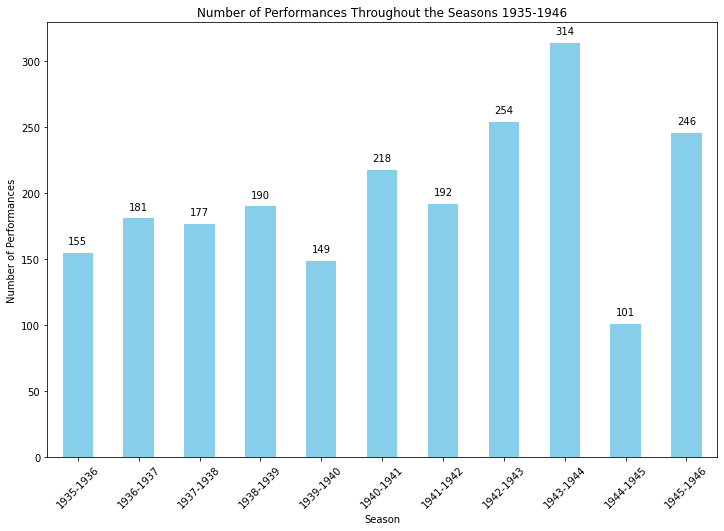

In [17]:
# Count the number of performances for five years before the war and during
title_counts = df_1893_1946['Season'].value_counts().reindex(['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '1945-1946'])
plt.figure(figsize=(12, 8))
bars = title_counts.plot(kind='bar', color='skyblue')

# Add counts on top of the bars
for bar, value in zip(bars.patches, title_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom')

plt.title('Number of Performances Throughout the Seasons 1935-1946')
plt.xlabel('Season')
plt.ylabel('Number of Performances')
plt.xticks(rotation=45)
plt.show()

<Figure size 1296x864 with 0 Axes>

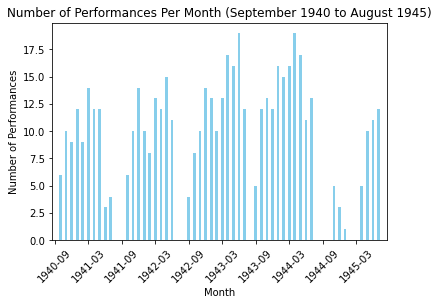

In [18]:
# Convert Date to datetime format
df_1893_1946['Date'] = pd.to_datetime(df_1893_1946['Date'])

# Select months from September 1940 to August 1945
all_months_df = pd.DataFrame(index=pd.period_range('1940-09-01', '1945-08-31', freq='M'))

# Fill missing values
merged_df = all_months_df.merge(df_1893_1946.groupby(df_1893_1946['Date'].dt.to_period("M"))['Normalised title'].nunique(), how='left', left_index=True, right_index=True).fillna(0)

# Plot per month
plt.figure(figsize=(18, 12))
merged_df.plot(kind='bar', color='skyblue', legend=False)
plt.title('Number of Performances Per Month (September 1940 to August 1945)')
plt.xlabel('Month')
plt.ylabel('Number of Performances')
plt.xticks(np.arange(0, len(merged_df.index), step=6), rotation=45)  # Show every 6th month
plt.show()

# Ratio
The ratio of performances between five years before the war (1935 to 1940) and during the war (1940 to 1945)

In [19]:
# Count performances per season
season_counts = df_1893_1946.groupby('Season')['Performances_ID'].count()

# Calculate the ratio and percentage
ratio = season_counts['1935-1936':'1939-1940'].sum() / season_counts['1940-1941':'1945-1946'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 0.6430188679245283
Percentage: 64.30%


In [20]:
# Define the seasons for before WWII and during the war
seasons_before_war = ['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940']
seasons_during_war = ['1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945']

# Count the number of unique titles for each period
unique_performances_before_war = df_1893_1946[df_1893_1946['Season'].isin(seasons_before_war)]['Performances_ID'].nunique()
unique_performances_during_war = df_1893_1946[df_1893_1946['Season'].isin(seasons_during_war)]['Performances_ID'].nunique()

# Print the counts
print("Number of unique performances before WWII:", unique_performances_before_war)
print("Number of unique performances during the war:", unique_performances_during_war)

Number of unique performances before WWII: 722
Number of unique performances during the war: 964


In [21]:
from scipy.stats import chi2_contingency

# performances before and during the war
performances = np.array([[722, 964]])

# Perform chi-squared test
chi_squared, p_value, _, _ = chi2_contingency(performances)

print(f"The chi-squared statistic is {chi_squared}")
print(f"The p-value is {p_value}")

The chi-squared statistic is 0.0
The p-value is 1.0


## Comparison of absolute frequency of the productions.
Will there be more or fewer different titles before and during the war?

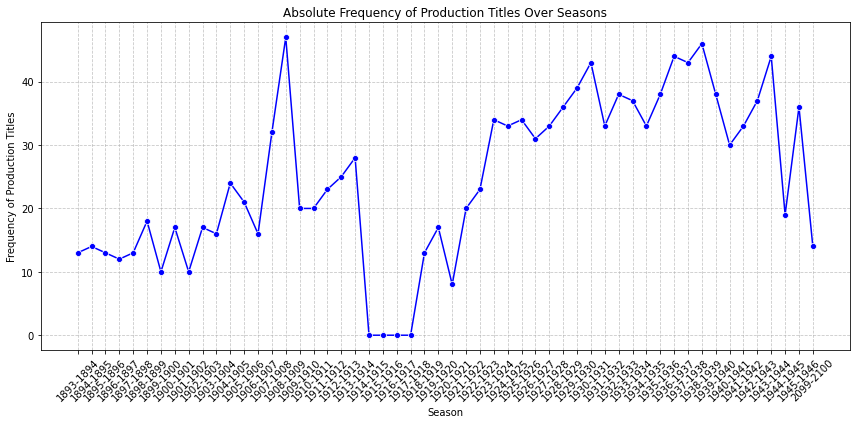

In [22]:
seasons = season_counts.index
frequency = season_counts.values

# Closed seasons
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']

# Group by Season and count unique Normalised title
season_counts = df_1893_1946.groupby('Season')['Normalised title'].nunique().reset_index()

# Create a DataFrame for closed seasons with zero counts
closed_season_df = pd.DataFrame({'Season': closed_seasons, 'Normalised title': 0})

# Concatenate the closed seasons DataFrame with the original season_counts
combined_season_counts = pd.concat([season_counts, closed_season_df], ignore_index=True)

# Sort the combined data based on the 'Season' column
combined_season_counts = combined_season_counts.sort_values(by='Season')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_season_counts, x='Season', y='Normalised title', marker='o', color='b')
plt.title('Absolute Frequency of Production Titles Over Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency of Production Titles')
plt.xticks(rotation=45)  
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

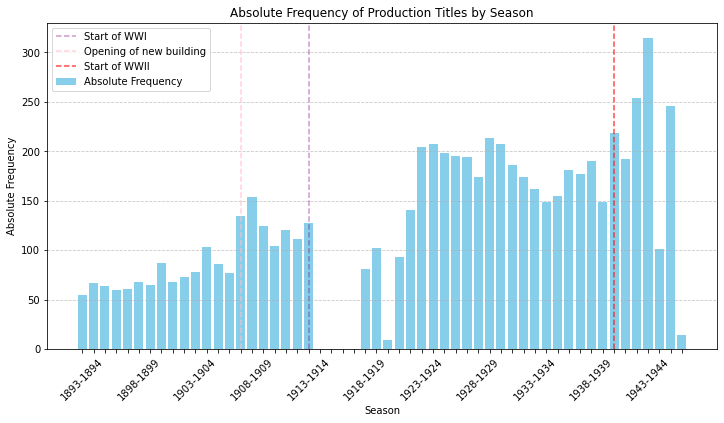

In [23]:
# Plot the absolute frequency using a bar plot
season_counts = df_1893_1946.groupby('Season')['Normalised title'].count()

# Add zero counts for the closed seasons
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']
season_counts = season_counts.reindex(season_counts.index.union(closed_seasons), fill_value=0).sort_index()

seasons = season_counts.index
frequency = season_counts.values

# Plot
plt.figure(figsize=(12, 6))
plt.bar(season_counts.index, season_counts.values, color='skyblue', label='Absolute Frequency')

# Add vertical lines for the markers
plt.axvline(x=20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=season_counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.xlabel('Season')
plt.ylabel('Absolute Frequency')
plt.xticks(rotation=45)  

plt.title('Absolute Frequency of Production Titles by Season')
# Show ticks every 5 years
x_ticks = [seasons[i] if i % 5 == 0 else '' for i in range(len(seasons))]
plt.xticks(seasons, x_ticks, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# Calculate the ratio and percentage
ratio = season_counts['1935-1936':'1939-1940'].sum() / season_counts['1940-1941':'1945-1946'].sum()
percentage_ratio = ratio * 100

print(f"Ratio: {ratio}\nPercentage: {percentage_ratio:.2f}%")

Ratio: 0.6430188679245283
Percentage: 64.30%


In [25]:
# Filter rows for the two periods
titles_before_war = df_1893_1946[df_1893_1946['Season'].isin(seasons_before_war)]['Normalised title'].nunique()
titles_during_war = df_1893_1946[df_1893_1946['Season'].isin(seasons_during_war)]['Normalised title'].nunique()
print("Number of unique titles before WWII:", titles_before_war)
print("Number of unique titles during the war:", titles_during_war)

Number of unique titles before WWII: 124
Number of unique titles during the war: 82


In [26]:
# performances before and during the war
performances = np.array([[124, 82]])

# Perform chi-squared test
chi_squared, p_value, _, _ = chi2_contingency(performances)

print(f"The chi-squared statistic is {chi_squared}")
print(f"The p-value is {p_value}")

The chi-squared statistic is 0.0
The p-value is 1.0


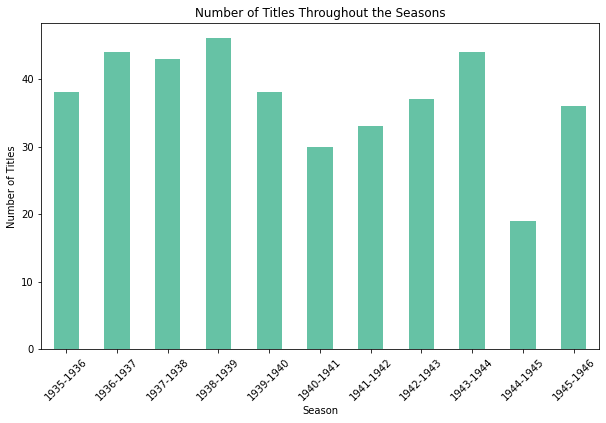

In [27]:
# Group by 'Season' and count unique 'Normalised title'
title_counts = df_1893_1946.groupby('Season')['Normalised title'].nunique().reindex(['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '1945-1946'])

# Create a bar plot
plt.figure(figsize=(10, 6))
title_counts.plot(kind='bar')
plt.title('Number of Titles Throughout the Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## Comparison of absolute frequency of the premieres

In [28]:
# # Filter rows with 'eerste vertoning' or 'eerste opvoering' in the 'Occasion' column
# premiere_df = df_1893_1946[df_1893_1946['Occasion'].str.contains('eerste vertoning|eerste opvoering', case=False, na=False)]

# # Exclude rows with 'Niet echt eerste opvoering' in the 'Occasion' column
# premiere_df = premiere_df[~premiere_df['Occasion'].str.contains('Niet echt eerste opvoering', case=False, na=False)]

# # Select columns
# premiere_df = premiere_df[['Normalised title', 'Date', 'Occasion', 'Original language', 'Season']]
# premiere_df.shape

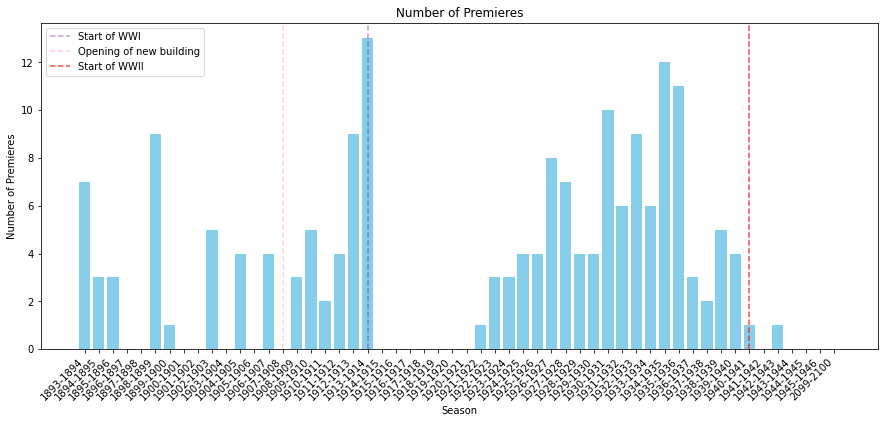

In [29]:
# Closed seasons
closed_seasons = ['1914-1915', '1915-1916', '1916-1917', '1917-1918']

# Filter rows with 'eerste vertoning' or 'eerste opvoering' in the 'Occasion' column
premiere_df = df_1893_1946[df_1893_1946['Occasion'].str.contains('eerste vertoning|eerste opvoering', case=False, na=False)]

# Exclude rows with 'Niet echt eerste opvoering' in the 'Occasion' column
premiere_df = premiere_df[~premiere_df['Occasion'].str.contains('Niet echt eerste opvoering', case=False, na=False)]

# Select columns
premiere_df = premiere_df[['Normalised title', 'Date', 'Occasion', 'Original language', 'Season']]

# Count the number of premieres for each season
premiere_counts = premiere_df['Season'].value_counts()

# Create a DataFrame with all seasons and fill premiere counts
all_seasons = df_1893_1946['Season'].unique()
premiere_counts = premiere_counts.reindex(all_seasons, fill_value=0).sort_index()

# Add zero counts for closed seasons
for closed_season in closed_seasons:
    if closed_season not in premiere_counts.index:
        premiere_counts[closed_season] = 0

# Sort the index
premiere_counts = premiere_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(premiere_counts.index, premiere_counts, color='skyblue')
plt.title('Number of Premieres')

# Add vertical lines for the markers
plt.axvline(x=20, color='purple', alpha=0.4, linestyle='--', label='Start of WWI')
plt.axvline(x=14, color='pink', alpha=0.7, linestyle='--', label='Opening of new building')
plt.axvline(x=premiere_counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.xlabel('Season')
plt.ylabel('Number of Premieres')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
# How many premieres were there between 1934 and 1946?
# Filter rows between 1934-1934 and 1945-1946
premieres_1934_1946 = premiere_df[(premiere_df['Season'] >= '1934-1935') & (premiere_df['Season'] <= '1945-1946')]
print("Number of Premieres between 1934 and 1946:", premieres_1934_1946.shape[0])

# How many premieres were there between 1934 and 1946?
# Filter rows between 1934-1934 and 1945-1946
premierestotal = premiere_df[(premiere_df['Season'] >= '1893-1894') & (premiere_df['Season'] <= '1945-1946')]
print("Number of Premieres between 1893 and 1946:", premierestotal.shape[0])

Number of Premieres between 1934 and 1946: 39
Number of Premieres between 1893 and 1946: 180


In [31]:
# How many premieres 5 years before the war and during?
# Define the seasons for before WWII and during the war
#seasons_before_war = ['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940']
#seasons_during_war = ['1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945']

# Count how many premieres are in seasons before WWII
premieres_before_war = premiere_df[premiere_df['Season'].isin(seasons_before_war)]

# Count how many premieres are during the war
premieres_during_war = premiere_df[premiere_df['Season'].isin(seasons_during_war)]

count_before_war = len(premieres_before_war)
count_during_war = len(premieres_during_war)
print("Number of premieres before WWII:", count_before_war)
print("Number of premieres during the war:", count_during_war)

# Extract the titles of premieres during the war
premieres_during_war_titles = premieres_during_war['Normalised title']

# Print the titles
for title in premieres_during_war_titles:
    print(title)

Number of premieres before WWII: 25
Number of premieres during the war: 2
Romeo en Julia
Monika


In [32]:
# Ratio
premieres_5_years_1 = 25
premieres_5_years_2 = 2

# Calculate the relative change
percentage_change = ((premieres_5_years_2 - premieres_5_years_1) / premieres_5_years_1) * 100
print(f"The percentage change in premieres is: {percentage_change:.2f}%")

The percentage change in premieres is: -92.00%


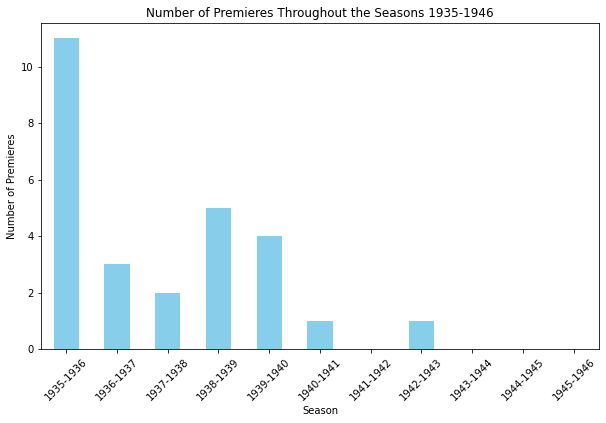

In [33]:
# Zooming in on the war time years
# Count the number of premieres for five years before the war and during
premiere_counts = premiere_df['Season'].value_counts().reindex(['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '1945-1946'])

# Create a bar plot
plt.figure(figsize=(10, 6))
premiere_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Premieres Throughout the Seasons 1935-1946')
plt.xlabel('Season')
plt.ylabel('Number of Premieres')
plt.xticks(rotation=45)
plt.show()

# Wehrmacht events

In [34]:
#df_1893_1946['Occasion'].unique()

In [35]:
Wehrmacht_df = df_1893_1946[df_1893_1946['Occasion'].str.contains('Wehrmach', case=False, na=False)]
len(Wehrmacht_df)

Wehrmacht_df = Wehrmacht_df[['Normalised title', 'Date', 'Occasion', 'Original language', 'Season', 'Leaflet_Language']]

Wehrmacht_df['Occasion'].unique()

# How many wehrmacht events were there in total?
len(Wehrmacht_df)

45

In [36]:
# In what language were the leaflets promoting the Wehrmacht evens?

Wehrmacht_languages = Wehrmacht_df.groupby('Leaflet_Language')['Occasion'].count()
print(Wehrmacht_languages)

Leaflet_Language
German    45
Name: Occasion, dtype: int64


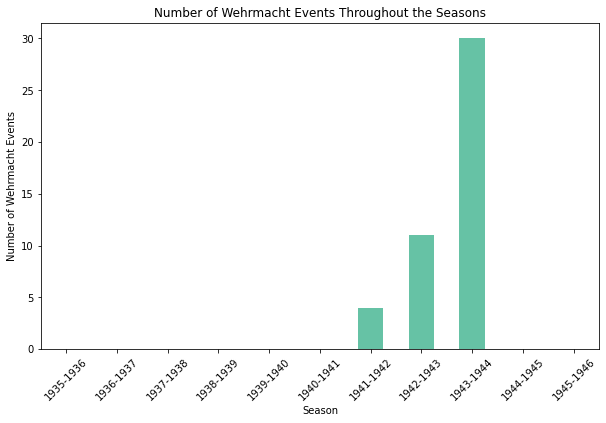

In [37]:
# # Count the number of Wehrmacht events
Wehrmacht_counts = Wehrmacht_df['Season'].value_counts().reindex(['1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '1945-1946'])
plt.figure(figsize=(10, 6))
Wehrmacht_counts.plot(kind='bar')
plt.title('Number of Wehrmacht Events Throughout the Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wehrmacht Events')
plt.xticks(rotation=45)
plt.show()

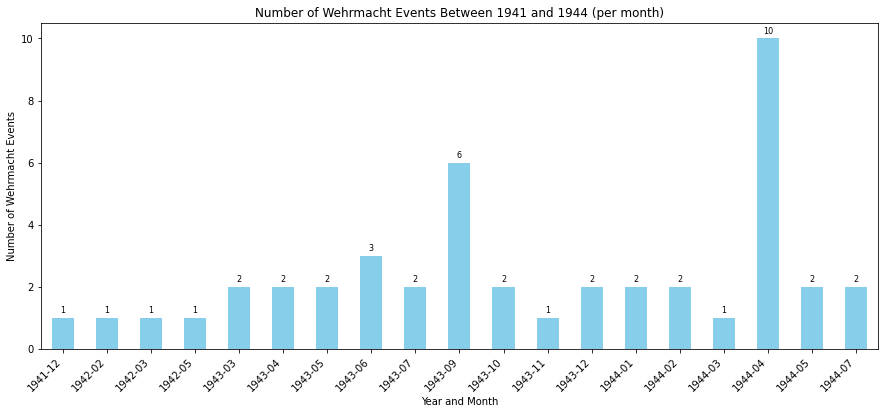

In [38]:
Wehrmacht_df['Date'] = pd.to_datetime(Wehrmacht_df['Date'])

# Filter data for the Wehrmacht events between 1941 and 1944 (first event was in December 1941 and last in July 1944)
Wehrmacht_filtered = Wehrmacht_df[(Wehrmacht_df['Date'].dt.year >= 1941) & (Wehrmacht_df['Date'].dt.year <= 1944)]

# Count the number of Wehrmacht events for each month
Wehrmacht_counts = Wehrmacht_filtered['Date'].dt.to_period("M").value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
Wehrmacht_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Wehrmacht Events Between 1941 and 1944 (per month)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Wehrmacht Events')
plt.xticks(rotation=45, ha='right')

# Add numbers on top of the bars
for i, v in enumerate(Wehrmacht_counts):
    plt.text(i, v + 0.1, str(int(v)), ha='center', va='bottom', fontsize=8)

plt.show()

<Figure size 1728x720 with 0 Axes>

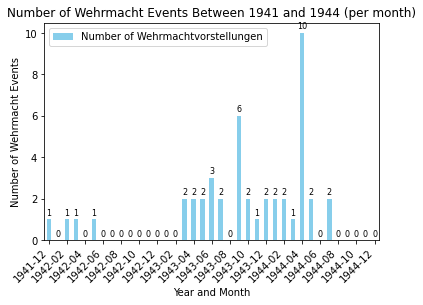

In [39]:
Wehrmacht_df['Date'] = pd.to_datetime(Wehrmacht_df['Date'])

# Create a DataFrame with all months in the range excluding Jan 1941 to Nov 1941
all_months = pd.period_range(start='1941-12', end='1944-12', freq='M')

# Filter data for the Wehrmacht events between Dec 1941 and Dec 1944
Wehrmacht_filtered = Wehrmacht_df[(Wehrmacht_df['Date'].dt.year >= 1941) & (Wehrmacht_df['Date'].dt.year <= 1944)]

# Count the number of Wehrmachtvorstellungen for each month
Wehrmacht_counts = Wehrmacht_filtered['Date'].dt.to_period("M").value_counts().sort_index()

# Create a DataFrame with all months and merge it with Wehrmacht_counts
all_months_df = pd.DataFrame(index=all_months)
Wehrmacht_counts = pd.merge(all_months_df, pd.DataFrame({'Number of Wehrmachtvorstellungen': Wehrmacht_counts}), left_index=True, right_index=True, how='left')

# Fill NaN values with 0
Wehrmacht_counts = Wehrmacht_counts.fillna(0)

# Create a bar plot
plt.figure(figsize=(24, 10))
ax = Wehrmacht_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Wehrmacht Events Between 1941 and 1944 (per month)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Wehrmacht Events')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, len(all_months), 2), all_months[::2])

# Add numbers on top of the bars
for i, v in enumerate(Wehrmacht_counts['Number of Wehrmachtvorstellungen']):
    ax.text(i, v + 0.1, str(int(v)), ha='center', va='bottom', fontsize=8)

plt.show()

In [40]:
Wehrmacht_counts

,Number of Wehrmachtvorstellungen
1941-12,1.0
1942-01,0.0
1942-02,1.0
1942-03,1.0
1942-04,0.0
1942-05,1.0
1942-06,0.0
1942-07,0.0
1942-08,0.0
1942-09,0.0


# Overview of language percentages

In [41]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [42]:
# Get unique seasons and order them
unique_seasons = df_1893_1946['Season'].unique()
ordered_seasons = sorted(unique_seasons)

In [43]:
# How many performances were classified as Season 2099-2100
performances_2099_2100 = df_1893_1946[df_1893_1946['Season'] == '2099-2100']['Performances_ID'].nunique()
performances_2099_2100

14

In [44]:
# Italian

# Store results
performance_dfITA = pd.DataFrame(columns=['Season', 'Performances_Italian', 'Percentage_Italian'])

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances = df_1893_1946[df_1893_1946['Season'] == season]['Performances_ID'].nunique()
    performances_italian = df_1893_1946[(df_1893_1946['Season'] == season) & (df_1893_1946['Original language'] == 'ITA')]['Performances_ID'].nunique()
    percentage_italian = (performances_italian / total_performances) * 100
    
    # Add to the DataFrame
    performance_dfITA = performance_dfITA.append({'Season': season, 'Performances_Italian': performances_italian, 'Percentage_Italian': percentage_italian}, ignore_index=True)

# Display the resulting DataFrame
performance_dfITA

,Season,Performances_Italian,Percentage_Italian
0,1893-1894,0,0.0
1,1894-1895,0,0.0
2,1895-1896,0,0.0
3,1896-1897,0,0.0
4,1897-1898,0,0.0
5,1898-1899,5,7.352941
6,1899-1900,0,0.0
7,1900-1901,13,14.942529
8,1901-1902,0,0.0
9,1902-1903,6,8.219178


In [45]:
# French
# Create an empty DataFrame to store results
performance_df = pd.DataFrame(columns=['Season', 'Performances_French', 'Percentage_French'])

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances = df_1893_1946[df_1893_1946['Season'] == season]['Performances_ID'].nunique()
    performances_French = df_1893_1946[(df_1893_1946['Season'] == season) & (df_1893_1946['Original language'] == 'FR')]['Performances_ID'].nunique()
    percentage_French = (performances_French / total_performances) * 100
    
    # Append to the DataFrame
    performance_df = performance_df.append({'Season': season, 'Performances_French': performances_French, 'Percentage_French': percentage_French}, ignore_index=True)

# Display the resulting DataFrame
performance_df

,Season,Performances_French,Percentage_French
0,1893-1894,0,0.0
1,1894-1895,1,1.492537
2,1895-1896,0,0.0
3,1896-1897,1,1.666667
4,1897-1898,3,4.918033
5,1898-1899,2,2.941176
6,1899-1900,0,0.0
7,1900-1901,9,10.344828
8,1901-1902,2,2.941176
9,1902-1903,0,0.0


In [46]:
# Dutch

# Create an empty DataFrame to store results
performance_df = pd.DataFrame(columns=['Season', 'Performances_Dutch', 'Percentage_Dutch'])

# Iterate over the ordered seasons
for season in ordered_seasons:
    total_performances = df_1893_1946[df_1893_1946['Season'] == season]['Performances_ID'].nunique()
    performances_Dutch = df_1893_1946[(df_1893_1946['Season'] == season) & (df_1893_1946['Original language'] == 'NL')]['Performances_ID'].nunique()
    percentage_Dutch = (performances_Dutch / total_performances) * 100
    
    # Append to the DataFrame
    performance_df = performance_df.append({'Season': season, 'Performances_Dutch': performances_Dutch, 'Percentage_Dutch': percentage_Dutch}, ignore_index=True)

# Display the resulting DataFrame
performance_df

,Season,Performances_Dutch,Percentage_Dutch
0,1893-1894,22,40.0
1,1894-1895,3,4.477612
2,1895-1896,1,1.5625
3,1896-1897,28,46.666667
4,1897-1898,12,19.672131
5,1898-1899,11,16.176471
6,1899-1900,28,43.076923
7,1900-1901,25,28.735632
8,1901-1902,50,73.529412
9,1902-1903,33,45.205479
